<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from google.colab import drive

#accessing My GDrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


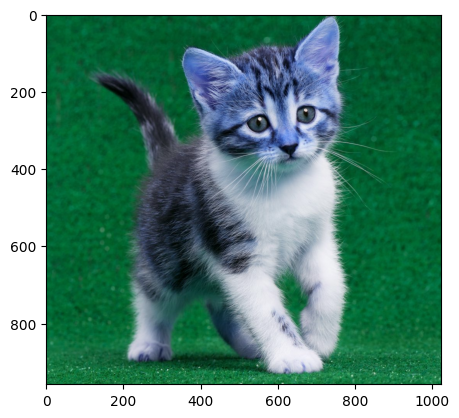

In [151]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/kitten01.jpg')
plt.imshow(img)

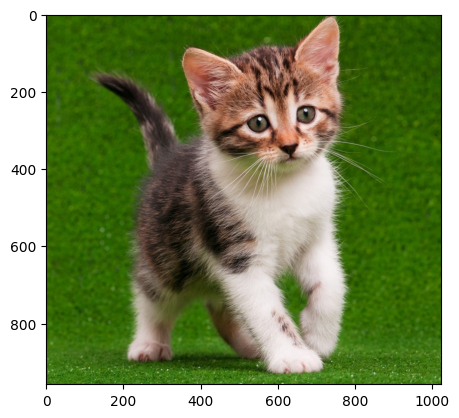

In [152]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

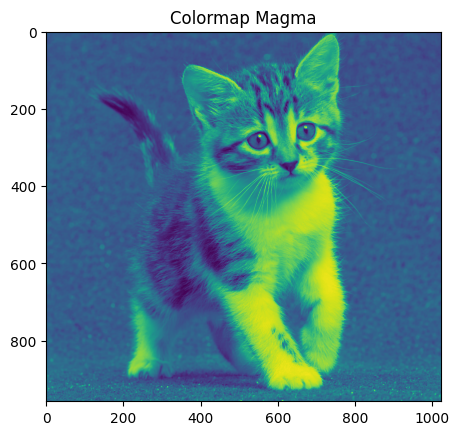

In [153]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/kitten01.jpg', cv.IMREAD_GRAYSCALE)


plt.imshow(img_gray)
plt.title('Gray')

plt.imshow(img_gray, cmap='gray')
plt.title('Colormap Gray')

plt.imshow(img_gray, cmap='magma')
plt.title('Colormap Magma')

plt.imshow(img_gray)

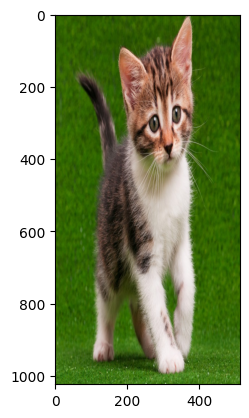

In [154]:
img4 = cv.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB),(512,1024))
plt.imshow(img4)

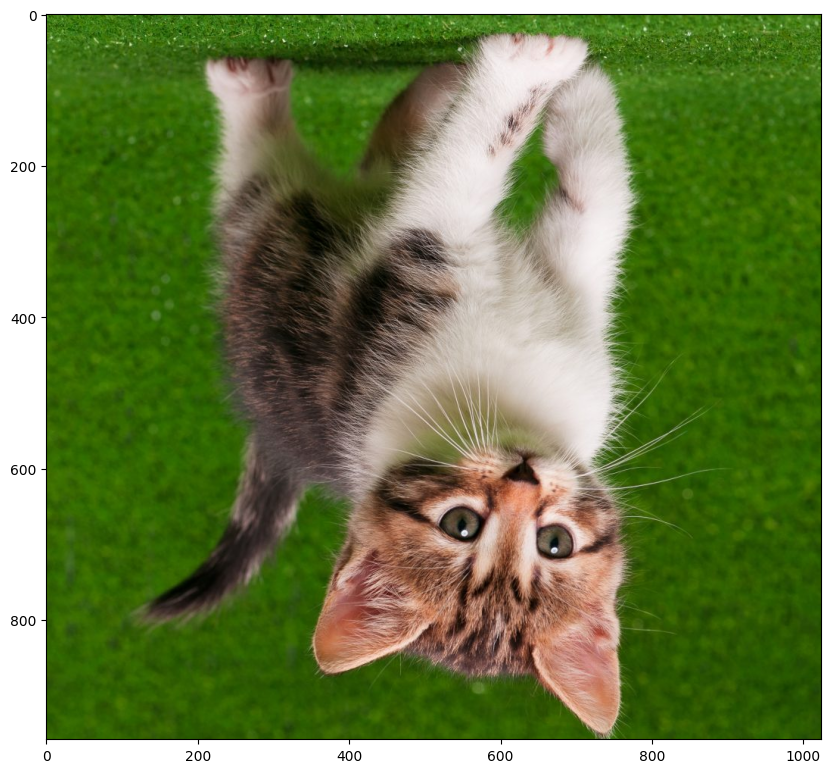

In [155]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB),0)
#simpan file image
#cv.imwrite('/content/drive/MyDrive/PCVK_MR/Images/try.tiff',img5)

#tampilkan plot dengan ukuran canvas yg lebih besar
fig = plt.figure(figsize=(10,10)) #ubah ukuran sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

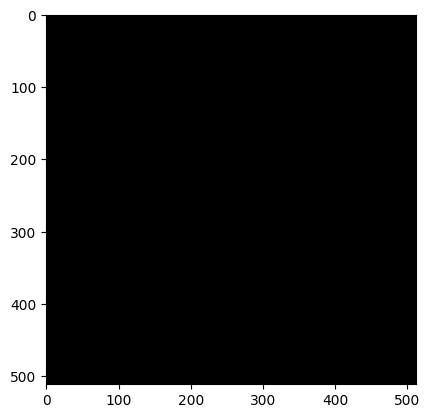

In [156]:
black_img = np.zeros(shape=(512,512,3),dtype=np.int16)

#perhatikan koordinat titik pt1 dan pt2
cv.rectangle(black_img,pt1=(384,0),pt2=(510,150),color=(0,255,0),thickness=10)

cv.rectangle(black_img,pt1=(200,200),pt2=(300,300),color=(0,0,255),thickness=20)

cv.circle(black_img,center=(100,100),radius=60,color=(255,0,0),thickness=8)

cv.circle(black_img,center=(400,400),radius=60,color=(255,0,0),thickness=-1)

cv.line(black_img,pt1=(0,0),pt2=(512,512),color=(255,255,255),thickness=5)
#showing image

#adding font
font = cv.FONT_HERSHEY_TRIPLEX
cv.putText(black_img,text='Hello',org=(10,500),fontFace=font,fontScale=4,color=(255,255,255),thickness=2,lineType=cv.LINE_AA)

#pembuatan black image kembali
black_img2=np.zeros(shape=(512,512,3),dtype=np.int32)
plt.imshow(black_img2)

In [157]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices

pts =vertices.reshape((-1,1,2)) #nilai 2 untuk menunjukkan bahwa tiap titik dibuat 3 channel R,G,G
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

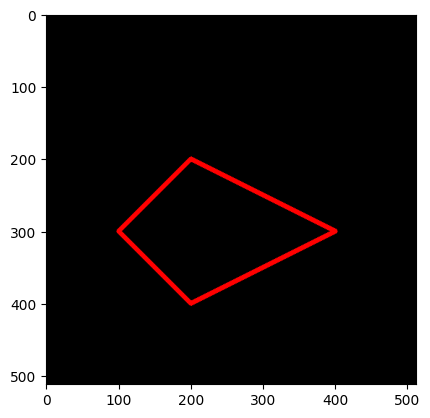

In [158]:
cv.polylines(black_img2,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(black_img2)

Pertanyaan

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?
2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?
3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut

from google.colab.patches import cv2_imshow
from skimage import io




Jawaban

1.penggunaan cv.cvtColor yang harus dilakukan jika menggunakan openCv dan tidak pada matplotlib.

2.perbedaan dan pengaruh penggunaan memory,range dan presisi dimana penggunaan int32 lebih aman dibanding int16 yang dikhawatirkan akan overflows.

3.digunakan untuk menampilkan gambar di colab ketika menggunakan openCv, "cv2_imshow" digunakan untuk menggantikan "cv.imshow" yang tidak dapat digunakan pada colab
digunakan untuk melakukan input/output gambar, dimana ini merupakan bagian dari modul scikit-image.

**Latihan**

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?
2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!
3. Tampilkan image baris ke 20-115, kolom 25-120!
4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!
5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!
6. Tampilkan image dengan posisi terbalik!
Berdasarkan praktikum bagian 3 dan 4 kerjakan beberapa tugas berikut :
7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat
beraktifitas (bukan pasfoto).
8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!
9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran
font, dan warna font yang sesuai keinginan anda.
10. Tunjukkan code program anda pada bapak/ibu dosen

**JAWAB**



1. Menggunakan figsize hanya mengganti ukuran yang ditampilkan pada plot, namun tidak mengubah ukuran pixel gambar. Gambar yang ditampilkan tetap memiliki resolusi pixel yang sama, tapi kita tetap dapat mengubah ukuran yang ditampilkan sesuai yang kita inginkan.

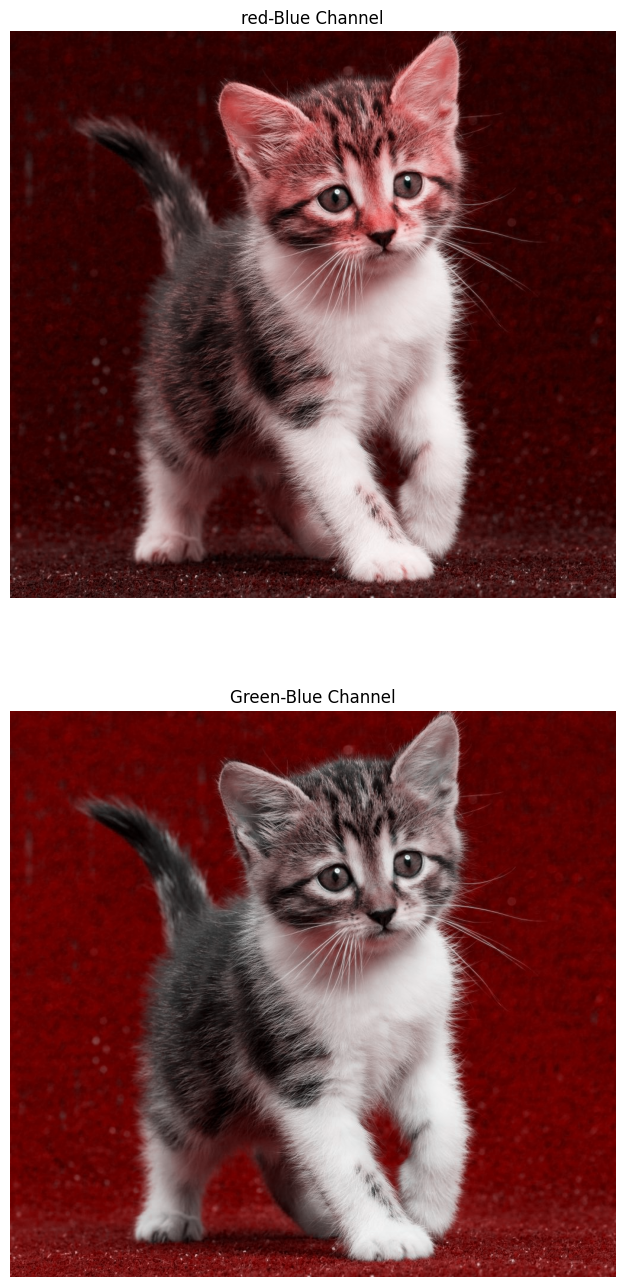

In [159]:
#jawaban no 2
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_channel = img_rgb[:,:,0]
green_channel = img_rgb[:,:,1]
blue_channel = img_rgb[:,:,2]

red_blue_channel = cv.merge([red_channel,blue_channel,blue_channel])
green_blue_channel = cv.merge([green_channel,blue_channel,blue_channel])

plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
plt.imshow(red_blue_channel)
plt.title('red-Blue Channel')
plt.axis('off')

plt.subplot(3,1,2)
plt.imshow(green_blue_channel)
plt.title('Green-Blue Channel')
plt.axis('off')

#plt.subplot(3,1,3)
#plt.imshow(img_rgb)
#plt.title('original Image')
#plt.axis('off')

plt.show()

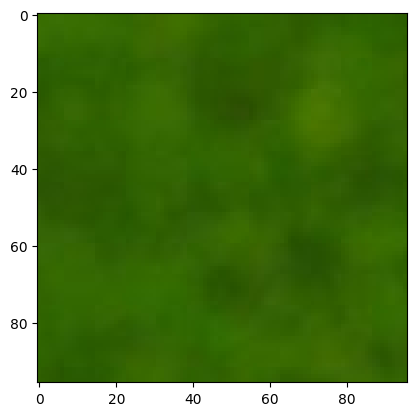

In [160]:
#menampilkan gambar pada baris 20-115 dan 25-120
cropped_img = img_rgb[20:116,25:121]
plt.imshow(cropped_img)

(-0.5, 1023.5, 25.5, -0.5)

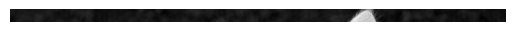

In [161]:
#menampilkan baris 5-30, semua kolom hanya channel red
cropped_img = img_rgb[5:31, :,0]
plt.imshow(cropped_img, cmap='gray')
plt.axis('off')


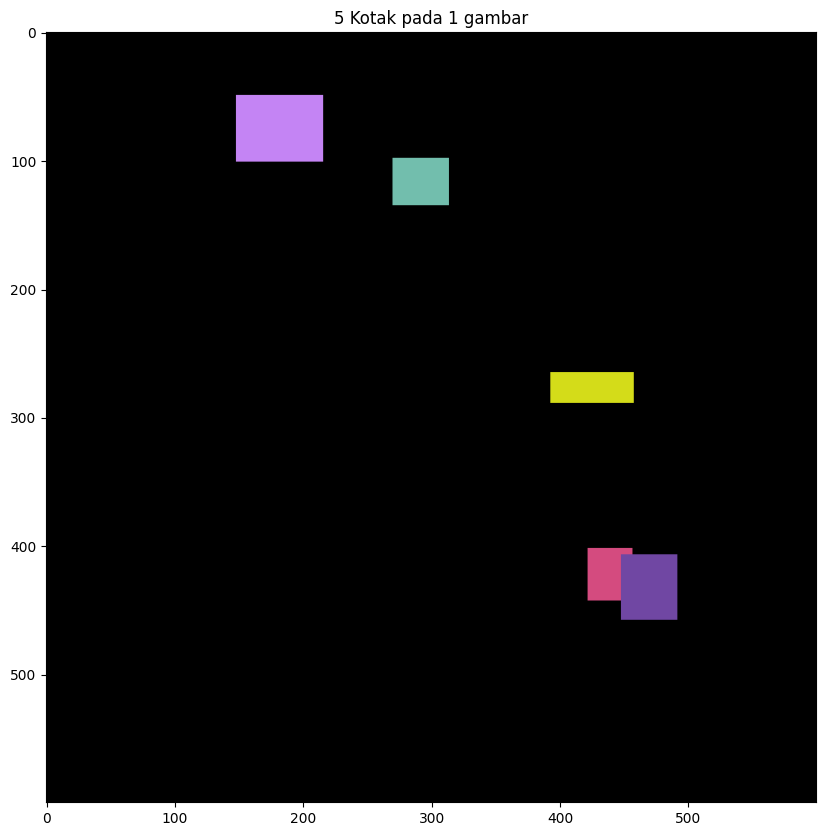

In [162]:
#membuat 5 kotak yang berbeda ukuran dan warna dalam satu gambar
height, width = 600, 600
image = np.zeros((height,width,3), dtype=np.uint8)

#membuat random color
def random_color():
  return np.random.randint(0,256, size=3).tolist()

def random_rect_params():
  x = np.random.randint(0,width - 50)
  y = np.random.randint(0,height - 50)
  w = np.random.randint(20, 80)
  h = np.random.randint(20, 80)
  return x,y,w,h

for _ in range(5):
    x, y, w, h = random_rect_params()
    color = random_color()
    cv.rectangle(image, (x, y), (x + w, y + h), color, -1)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title('5 Kotak pada 1 gambar')
plt.axis('on')
plt.show()

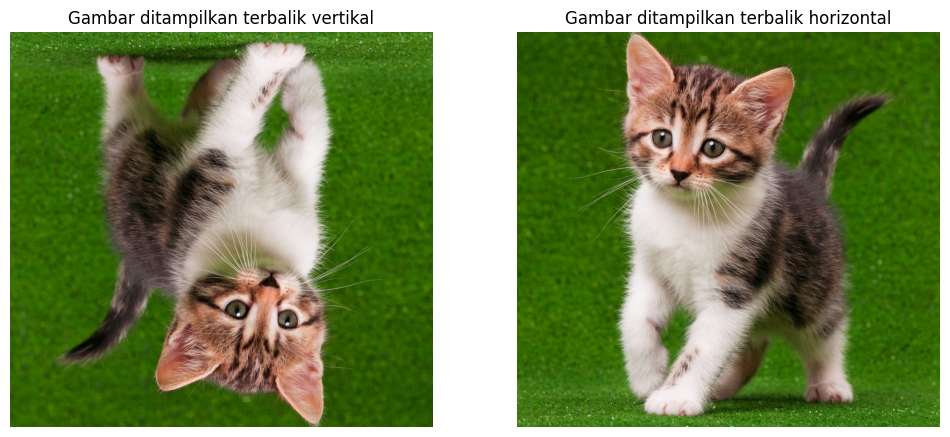

In [163]:
#menampilkan gambar terbalik atas bawah
flipped_vertical = cv.flip(img_rgb,0)
flipped_horizontal = cv.flip(img_rgb,1)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(flipped_vertical)
plt.title('Gambar ditampilkan terbalik vertikal')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(flipped_horizontal)
plt.title('Gambar ditampilkan terbalik horizontal')
plt.axis('off')


plt.show()

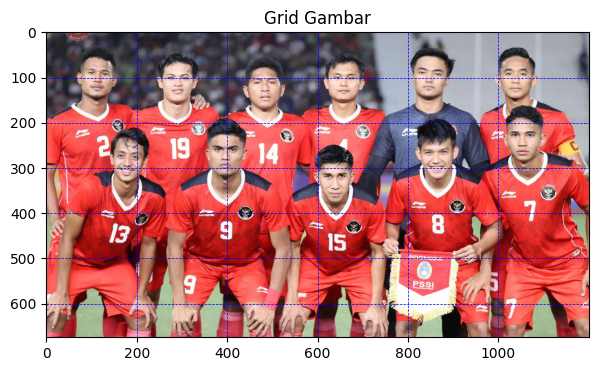

In [164]:
#
img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/P1.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.figure(figsize=(7,14))

plt.grid(True,which='both', color="blue", linestyle='--', linewidth=0.5)
plt.title("Grid Gambar")
plt.imshow(img)

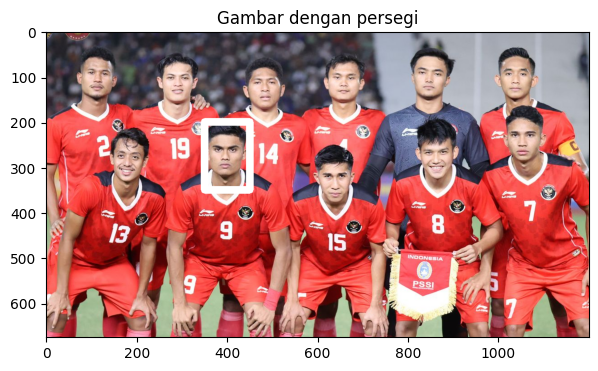

In [165]:
plt.figure(figsize=(7,14))

cv.rectangle(img, pt1=(450,200), pt2=(350,350), color=(255,255,255), thickness=15)
plt.title('Gambar dengan persegi')
plt.imshow(img)